In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas
import numpy
import os,sys,re,glob

# should be 3.1.1:
print(matplotlib.__version__)
%matplotlib notebook
#plt.rcParams['figure.figsize'] = [10, 10]

3.1.1


In [2]:
joinData = {}
for yearInt in range(2014,2017):
    joinData[yearInt] = pandas.read_csv('FullJoin'+str(yearInt)+'.csv')

In [3]:
joinData[2014].columns

Index(['year', 'area', 'zip_code', 'moisture', 'kernel_weight',
       'actual_wheat_ash', 'falling_no', 'protein_12', 'ZIP', 'COUNTY',
       'TOT_RATIO', 'adm2_code', 'date', 'doy', 'met_avg_t', 'met_gdd',
       'met_max_rh', 'met_max_t', 'met_max_vpd', 'met_min_rh', 'met_min_t',
       'met_p_mm', 'met_sh', 'met_sr_wm2', 'FIPScounty', 'earlYr', 'aggRain',
       'meanAvgT', 'aggGDD', 'meanMaxVPD', 'meanMaxRH', 'meanMinRH'],
      dtype='object')

In [4]:
n_bins = 50

# Grain Quality Metrics
***
## Moisture
### From the moisture content, 2014 winter wheat was clearly too high moisture with more than 60% of the wheat outside of the 10-12% moisture limits suggested by Wikipedia

https://en.wikipedia.org/wiki/Grain_quality

2014 percent of wheat within 10-12% : 38.02281368821293
2015 percent of wheat within 10-12% : 66.07929515418502
2016 percent of wheat within 10-12% : 76.19047619047619


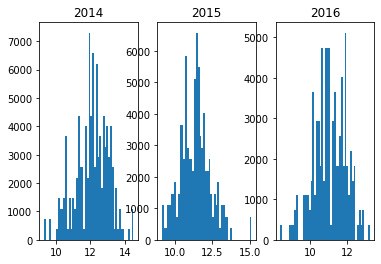

In [5]:
#figure(num=1, figsize=(10, 6))
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].moisture, n_bins)
    ax[_counter].set_title(str(yearInt))

    # determine percentage of wheat within 10-12% interval
    joinData[yearInt]['optimalMoist'] = numpy.where((joinData[yearInt].moisture < 12) &\
                                                 (joinData[yearInt].moisture > 10),1,0)

    print(str(yearInt)+' percent of wheat within 10-12% : '\
          +str(100*joinData[yearInt].optimalMoist.sum()/len(joinData[yearInt])))
    _counter += 1

***
## Kernel weight

2014 mean kernel_weight : 29.826501901140684
2015 mean kernel_weight : 27.676431718061668
2016 mean kernel_weight : 31.325666666666667


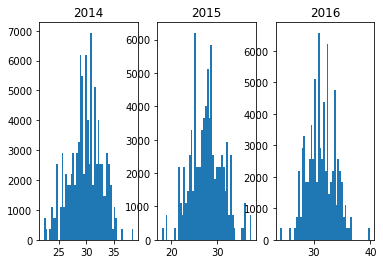

In [6]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].kernel_weight, n_bins)
    ax[_counter].set_title(str(yearInt))

    print(str(yearInt)+' mean kernel_weight : '\
          +str(joinData[yearInt].kernel_weight.mean()))
    _counter += 1

***
## Wheat ash

2014 mean actual_wheat_ash : 0.04624182509505704
2015 mean actual_wheat_ash : 0.0486352422907489
2016 mean actual_wheat_ash : 0.04787666666666667


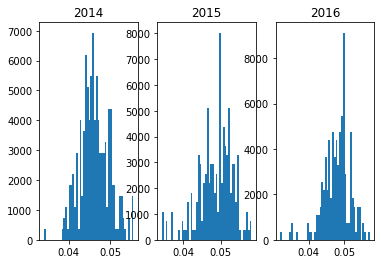

In [7]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].actual_wheat_ash, n_bins)
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean actual_wheat_ash : '\
            +str(joinData[yearInt].actual_wheat_ash.mean()))

    _counter += 1

***
## Protein_12
### Should be high for high quality wheat
https://www.ndsu.edu/faculty/simsek/wheat/flour.html

2014 mean protein_12 : 13.629681901977184
2015 mean protein_12 : 12.199694166687225
2016 mean protein_12 : 11.271302231480952


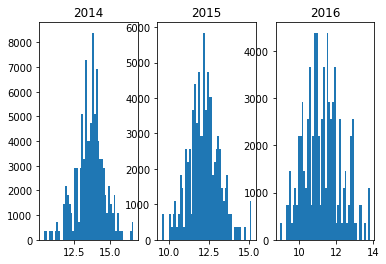

In [8]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].protein_12, n_bins)
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean protein_12 : '\
            +str(joinData[yearInt].protein_12.mean()))

    _counter += 1

***
## Falling Number

### Falling number is measurement of viscosity reduction over time due to $\alpha$-amylase activity from a sample of wheat starch paste. Higher falling numbers indicate a longer time to fall, which indicates higher quality seeds. 

- From Kweon (USDA)

2014 mean falling_no : 365.0
2014 percent of wheat above falling_no 200: 100.0
2015 mean falling_no : 391.38766519823787
2015 percent of wheat above falling_no 200: 100.0
2016 mean falling_no : 381.6095238095238
2016 percent of wheat above falling_no 200: 100.0


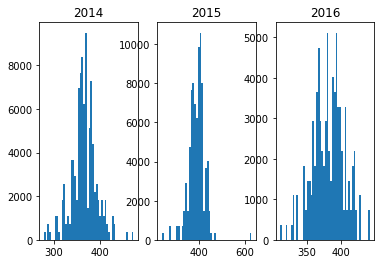

In [9]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].falling_no, n_bins)
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean falling_no : '\
            +str(joinData[yearInt].falling_no.mean()))

    
    # determine percentage of wheat above falling number of 200
    joinData[yearInt]['highFalling'] = numpy.where((joinData[yearInt].falling_no < 200),0,1)

    print(str(yearInt)+' percent of wheat above falling_no 200: '\
          +str(100*joinData[yearInt].highFalling.sum()/len(joinData[yearInt])))
    _counter += 1


# Weather Metrics

In [10]:
print(joinData[2014].columns)

Index(['year', 'area', 'zip_code', 'moisture', 'kernel_weight',
       'actual_wheat_ash', 'falling_no', 'protein_12', 'ZIP', 'COUNTY',
       'TOT_RATIO', 'adm2_code', 'date', 'doy', 'met_avg_t', 'met_gdd',
       'met_max_rh', 'met_max_t', 'met_max_vpd', 'met_min_rh', 'met_min_t',
       'met_p_mm', 'met_sh', 'met_sr_wm2', 'FIPScounty', 'earlYr', 'aggRain',
       'meanAvgT', 'aggGDD', 'meanMaxVPD', 'meanMaxRH', 'meanMinRH',
       'optimalMoist', 'highFalling'],
      dtype='object')


## Avg_t

2014 mean met_avg_t : 285.32317577488413
2015 mean met_avg_t : 286.6564110163539
2016 mean met_avg_t : 287.2551354206132


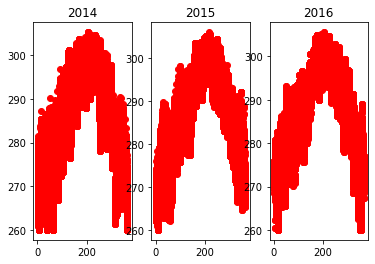

In [11]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_avg_t,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_avg_t : '\
          +str(joinData[yearInt].met_avg_t.mean()))
    
    _counter += 1

## met_gdd

2014 mean met_gdd : 6.48029454261227
2015 mean met_gdd : 6.953663308195346
2016 mean met_gdd : 7.230295374422717


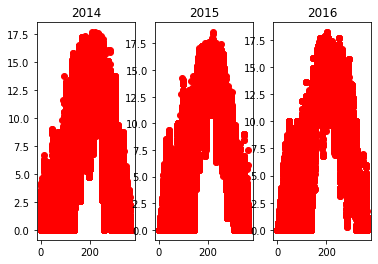

In [12]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_gdd,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_gdd : '\
          +str(joinData[yearInt].met_gdd.mean()))
    
    _counter += 1

## met_max_rh

2014 mean met_max_rh : 81.00039215927913
2015 mean met_max_rh : 88.57123786253092
2016 mean met_max_rh : 87.50749669647749


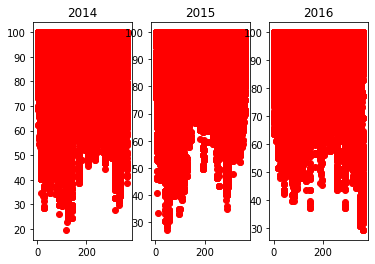

In [13]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_max_rh,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_max_rh : '\
          +str(joinData[yearInt].met_max_rh.mean()))
    
    _counter += 1

## met_max_t

2014 mean met_max_t : 292.4890963383509
2015 mean met_max_t : 293.4998071366846
2016 mean met_max_t : 294.3737490765819


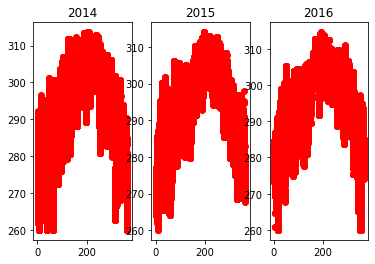

In [14]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_max_t,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_max_t : '\
          +str(joinData[yearInt].met_max_t.mean()))
    
    _counter += 1

## met_max_vpd

2014 mean met_max_vpd : 0.5757425068895591
2015 mean met_max_vpd : 0.32828407063918236
2016 mean met_max_vpd : 0.3676316908442216


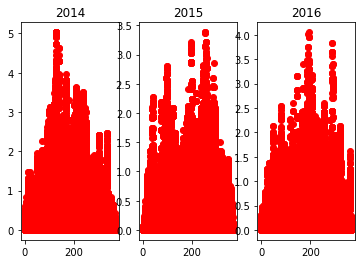

In [15]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_max_vpd,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_max_vpd : '\
          +str(joinData[yearInt].met_max_vpd.mean()))
    
    _counter += 1

## met_min_rh

2014 mean met_min_rh : 33.617778833480905
2015 mean met_min_rh : 39.225291165530145
2016 mean met_min_rh : 36.8446479445075


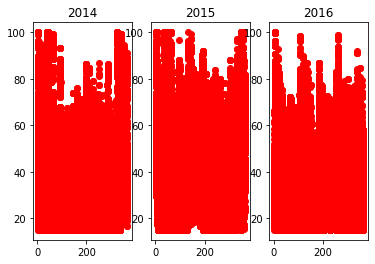

In [16]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_min_rh,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_min_rh : '\
          +str(joinData[yearInt].met_min_rh.mean()))
    
    _counter += 1

## met_min_t

2014 mean met_min_t : 278.15725490338036
2015 mean met_min_t : 279.81301520149657
2016 mean met_min_t : 280.1365214503588


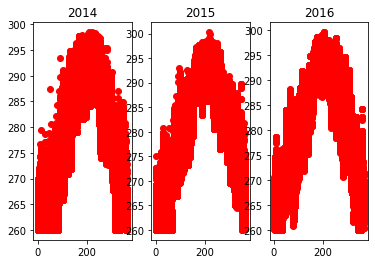

In [17]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_min_t,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_min_t : '\
          +str(joinData[yearInt].met_min_t.mean()))
    
    _counter += 1

## met_p_mm

2014 mean met_p_mm : 1.766825173811136
2015 mean met_p_mm : 2.498705465934464
2016 mean met_p_mm : 2.292220305807386


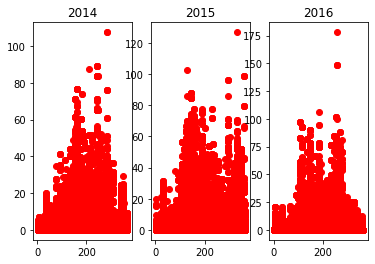

In [18]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_p_mm,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_p_mm : '\
          +str(joinData[yearInt].met_p_mm.mean()))
    
    _counter += 1

## met_sh

2014 mean met_sh : 0.010374879108286892
2015 mean met_sh : 0.011044780640878642
2016 mean met_sh : 0.011161350100652319


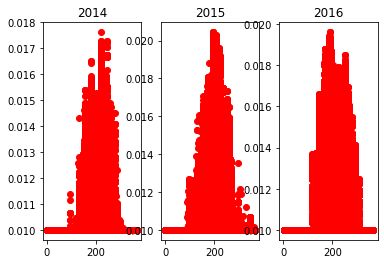

In [19]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_sh,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_sh : '\
          +str(joinData[yearInt].met_sh.mean()))
    
    _counter += 1

## met_sr_wm2
#### Shortwave downwelling radiation is all radiation at surface incident on the surface of the earth

2014 mean met_sr_wm2 : 195.35057332965258
2015 mean met_sr_wm2 : 194.77749042689038
2016 mean met_sr_wm2 : 197.18753328281798


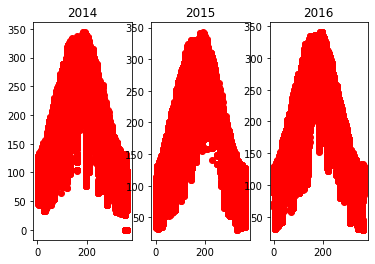

In [20]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].plot(joinData[yearInt].doy,joinData[yearInt].met_sr_wm2,'ro')
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean met_sr_wm2 : '\
          +str(joinData[yearInt].met_sr_wm2.mean()))
    
    _counter += 1